In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Questions to investigate
* What factors determine if a protest will be successful or violent?
* How are protests and state responses changing temporally and geographically?

### Datasets

[Mass Mobilization Protest Data](https://dataverse.harvard.edu/dataverse/MMdata)

[Additional information about protest data](https://reed-statistics.github.io/math141s21/projects/mass_mobilization/MM_codebook.pdf)

The **Mass Mobilization Protest dataset** contains data on protests across the world from 1990-2020 with information like:
* Date
* Country / Location
* Participant count
* Protester demands
* State actions
* Protester violence
* Additional text information

[Country-Year: V-Dem Full+Others](https://v-dem.net/data/the-v-dem-dataset/)

The **V-Dem dataset** contains detailed democracy ratings for countries over the years, with a variety of different political indicators and other information about countries.

By **combining these two** datasets, we can investigate protests in **greater detail**, using important context about the country's state and society. 

In [223]:
df_protest = pd.read_csv("C:/Users/Eric/Desktop/dataset/mmALL_073120_csv.csv")
df_dem = pd.read_csv("C:/Users/Eric/Desktop/dataset/V-Dem-CY-Full+Others-v14.csv", low_memory=False)

In [224]:
print(df_protest.shape)
print(df_dem.shape)

(17145, 31)
(27734, 4607)


## Initial pre-processing steps

In [226]:
#Replace invalid responses with NA

df_protest = df_protest[df_protest['protest'] == 1]
df_protest[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']] = \
df_protest[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']].replace('.', pd.NA)

df_protest[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6', ]] = \
df_protest[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6', ]].replace('.', pd.NA)

#### We want to initially try to join dem and protest on country and year.

In [228]:
df_dem.rename(columns={'country_name': 'country'}, inplace=True)
df_joined = pd.merge(df_protest, df_dem, on=['country', 'year'], how='inner')

In [229]:
countries_joined = set(df_joined['country'].unique())
countries_dem = set(df_dem['country'].unique())
countries_protest = set(df_protest['country'].unique())

missing_in_joined = countries_dem - countries_joined
print("Countries in df_dem but not in df_joined:", missing_in_joined)
print("\n")
missing_in_joined_protest = countries_protest - countries_joined
print("Countries in df_protest but not in df_joined:", missing_in_joined_protest)


Countries in df_dem but not in df_joined: {'Seychelles', 'Hanover', 'Mecklenburg Schwerin', 'Democratic Republic of the Congo', 'Solomon Islands', 'Nassau', 'Bosnia and Herzegovina', 'Israel', 'United States of America', 'Baden', 'Piedmont-Sardinia', 'Two Sicilies', 'South Yemen', 'Zanzibar', 'Tuscany', 'New Zealand', 'United Arab Emirates', 'Czechia', 'Trinidad and Tobago', 'Palestine/West Bank', 'Republic of Vietnam', 'Oldenburg', 'Australia', 'Palestine/British Mandate', 'Brunswick', 'North Macedonia', 'Saxe-Weimar-Eisenach', 'Parma', 'Timor-Leste', 'The Gambia', 'Sao Tome and Principe', 'Hamburg', 'Eswatini', 'Somaliland', 'Barbados', 'Burma/Myanmar', 'Iceland', 'Maldives', 'Hong Kong', 'Modena', 'Fiji', 'Palestine/Gaza', 'Slovakia', 'Türkiye', 'Bavaria', 'Republic of the Congo', 'Hesse-Kassel', 'Papal States', 'Vanuatu', 'Saxony', 'German Democratic Republic', 'Hesse-Darmstadt', 'Würtemberg', 'Malta'}


Countries in df_protest but not in df_joined: {'Congo Kinshasa', 'Slovak Repub

#### We can see there's a lot of inconsistencies for country names where the two datasets use a different name for the same country.

In [231]:
country_mapping = {
    'Timor-Leste': 'East Timor',
    'Somaliland': 'Somalia',
    'Czechia': 'Czech Republic',
    'Congo Brazzaville': 'Republic of the Congo',
    'New Hebrides': 'Vanuatu',
    'German Democratic Republic': 'East Germany',
    'The Gambia': 'Gambia',
    'United Arab Emirates': 'UAE',
    'North Macedonia': 'Macedonia',
    'Bosnia and Herzegovina': 'Bosnia',
    'South Yemen': 'Yemen',
    'Türkiye': 'Turkey',
    'Slovak Republic': 'Slovakia',
    'Swaziland': 'Eswatini',
    'Sao Tome and Principe': 'São Tomé and Príncipe',
    'Burma/Myanmar': 'Myanmar',
    'Congo Kinshasa': 'Democratic Republic of the Congo',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'Germany East': 'East Germany',
    'Germany West': 'West Germany'
}

In [232]:
df_dem['country'] = df_dem['country'].replace(country_mapping)
df_protest['country'] = df_protest['country'].replace(country_mapping)

#### We'll join them again now that we've corrected the names for consistency.

In [234]:
df_joined = pd.merge(df_protest, df_dem, on=['country', 'year'], how='inner')

In [235]:
countries_joined = set(df_joined['country'].unique())
countries_dem = set(df_dem['country'].unique())
countries_protest = set(df_protest['country'].unique())

missing_in_joined = countries_dem - countries_joined
print("Countries in df_dem but not in df_joined:", missing_in_joined)
print("\n")
missing_in_joined_protest = countries_protest - countries_joined
print("Countries in df_protest but not in df_joined:", missing_in_joined_protest)

Countries in df_dem but not in df_joined: {'Seychelles', 'Hanover', 'Mecklenburg Schwerin', 'Nassau', 'Solomon Islands', 'Israel', 'United States of America', 'Baden', 'Piedmont-Sardinia', 'Two Sicilies', 'Zanzibar', 'Tuscany', 'New Zealand', 'São Tomé and Príncipe', 'Palestine/West Bank', 'Republic of Vietnam', 'Oldenburg', 'Australia', 'Palestine/British Mandate', 'Brunswick', 'Saxe-Weimar-Eisenach', 'Parma', 'Hamburg', 'Barbados', 'Iceland', 'Maldives', 'Hong Kong', 'Modena', 'Fiji', 'Palestine/Gaza', 'UAE', 'Bavaria', 'East Timor', 'Hesse-Kassel', 'Papal States', 'Vanuatu', 'Saxony', 'Trinidad & Tobago', 'Hesse-Darmstadt', 'Würtemberg', 'Malta'}


Countries in df_protest but not in df_joined: {'West Germany', 'USSR', 'United Arab Emirate', 'Yugoslavia', 'Serbia and Montenegro', 'Czechoslovakia', 'Timor Leste'}


#### Rebucketing participants_category

In [237]:
category_mapping = {
    '1000-4999': '1000-9999',
    '2000-4999': '1000-9999',
    '1000-1999':'1000-9999',
    '5000-10000': '1000-9999',
    '>10000': '10000-99999'
}

df_joined['participants_category'] = df_joined['participants_category'].map(category_mapping).fillna(df_joined['participants_category'])
df_joined.loc[df_joined['participants'].str.contains('million', case=False, na=False), 'participants_category'] = '1M+'
df_joined.loc[df_joined['participants'].str.contains('000000', case=False, na=False), 'participants_category'] = '1M+'
df_joined.loc[df_joined['participants'].str.contains(',000,000', case=False, na=False), 'participants_category'] = '1M+'

df_joined.loc[df_joined['participants'].str.contains('hundreds of thousands', case=False, na=False), 'participants_category'] = '100000-999999'
df_joined.loc[df_joined['participants'].str.contains('00,000', case=False, na=False), 'participants_category'] = '100000-999999'
df_joined.loc[df_joined['participants'].str.contains('00000', case=False, na=False), 'participants_category'] = '100000-999999'

#### Helper functions for retrieving data with specific demand or response

In [239]:
def filter_by_demand(df, demand_string):
    condition = (
        (df['protesterdemand1'] == demand_string) | 
        (df['protesterdemand2'] == demand_string) |
        (df['protesterdemand3'] == demand_string) |
        (df['protesterdemand4'] == demand_string)
    )
    return df[condition]

def filter_by_response(df, response_string):
    condition = (
        (df['stateresponse1'] == response_string) |
        (df['stateresponse2'] == response_string) |
        (df['stateresponse3'] == response_string) |
        (df['stateresponse4'] == response_string) |
        (df['stateresponse5'] == response_string) |
        (df['stateresponse6'] == response_string)
    )
    return df[condition]

#example use:
#filtered_df = filter_by_demand(df_protest, 'political behavior, process')

## Data exploration

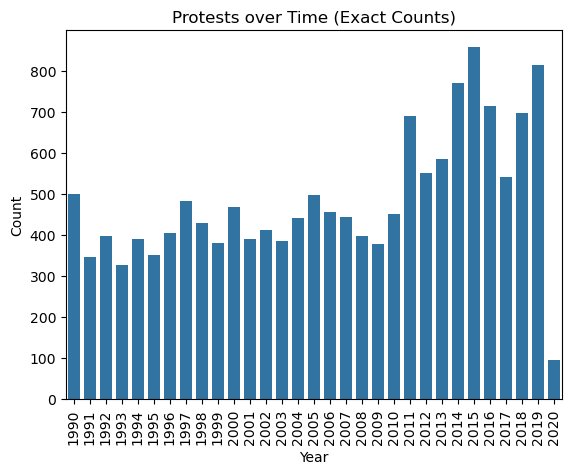

In [368]:
year_counts = df_joined['year'].value_counts().sort_index()

sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xticks(rotation=90)
plt.title("Protests over Time (Exact Counts)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

#### The 2010s had a signficiant uptick in protest activity compared to the last two decades.

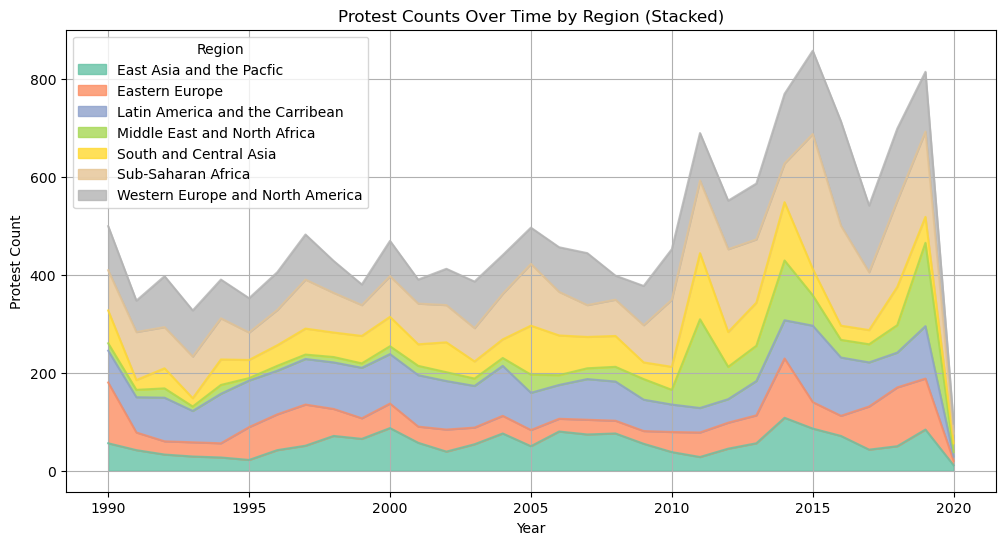

In [411]:
pivot_df = region_year_counts.pivot(index='year', columns='e_regionpol_7C', values='count').fillna(0)

pivot_df.plot(kind='area', stacked=True, figsize=(12,6), colormap='Set2', alpha=0.8)
plt.title("Protest Counts Over Time by Region (Stacked)")
plt.xlabel("Year")
plt.ylabel("Protest Count")
plt.legend(title="Region")
plt.grid(True)
plt.show()

#### Here we can see which regions contributed to these upticks. For example, we can see a more isolated increase in the Middle East and North Africa around 2011. This is explained by the Arab Spring which was a series of protests and uprisings across the Arab world during this time.

<Figure size 1200x600 with 0 Axes>

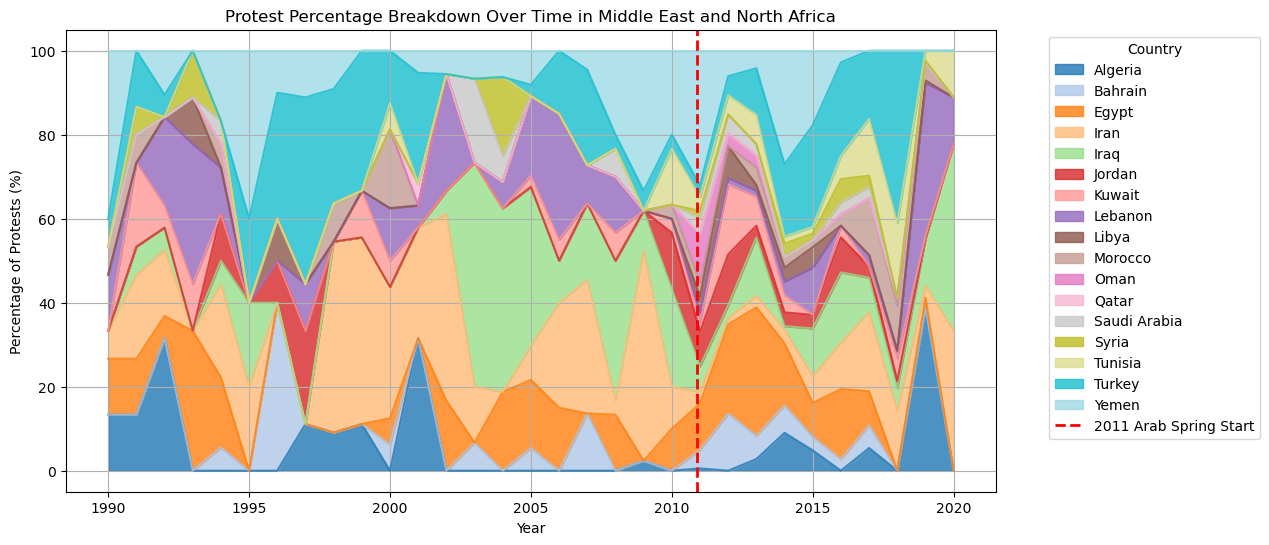

In [435]:
region_name = "Middle East and North Africa"
middleeast_df = df_joined[df_joined['e_regionpol_7C'] == region_name]
country_year_counts = middleeast_df.groupby(['year', 'country']).size().reset_index(name='count')
country_year_counts['percent'] = (
    country_year_counts.groupby('year')['count']
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(drop=True)
)
pivot_df = country_year_counts.pivot(index='year', columns='country', values='percent').fillna(0)
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20', alpha=0.8)

plt.axvline(x=2010.9, color='red', linestyle='--', linewidth=2, label="2011 Arab Spring Start")

plt.title(f"Protest Percentage Breakdown Over Time in {region_name}")
plt.xlabel("Year")
plt.ylabel("Percentage of Protests (%)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#### Here we can see the increase in Tunisian protests around the year 2010 which is where the Arab Spring began. After that, we can see increases in protest activity across countries like Egypt, Yemen, Iraq, Algeria, and others.

#### Additionally, we can see other major events like the 1999 Iranian student protests, 2003 US invasion of Iraq, and the 2005 Lebanese Cedar Revolution.

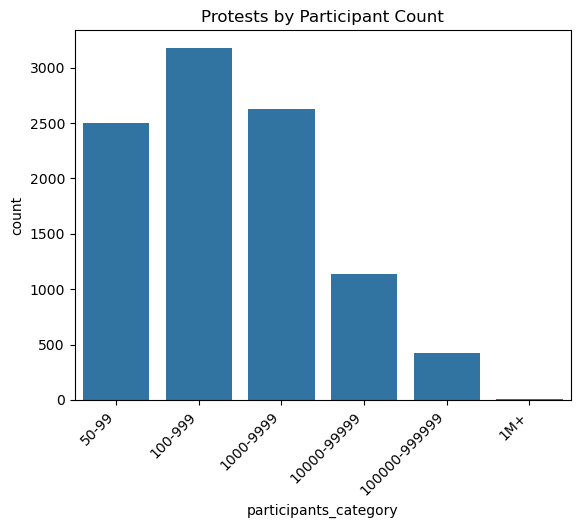

In [260]:
sns.countplot(data=df_joined, x='participants_category')
plt.xticks(rotation=45, ha='right')
plt.title("Protests by Participant Count")
plt.show()

#### Very few of the protests passed a million participants, with most centered around the 1000 mark.

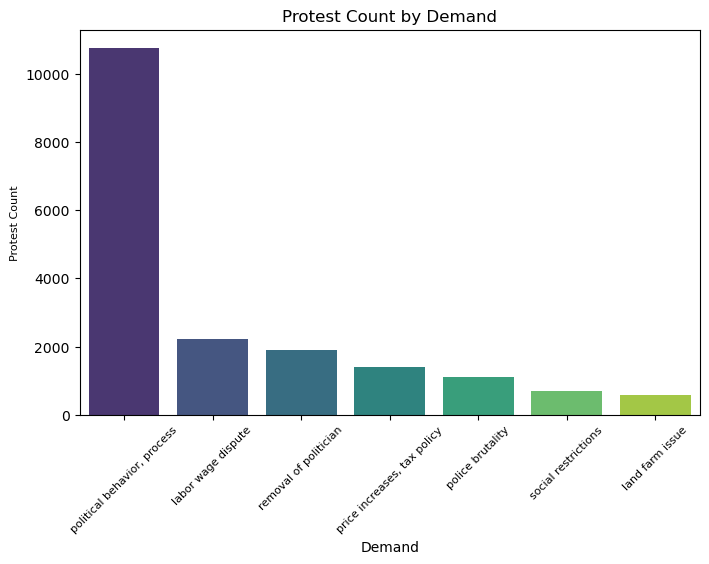

In [262]:
demand_distribution = df_protest[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']].stack()
demand_counts = demand_distribution.value_counts()
demand_counts_df = demand_counts.reset_index()
demand_counts_df.columns = ['demand', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=demand_counts_df, x='demand', y='count', hue='demand', palette='viridis', legend=False)
plt.title('Protest Count by Demand', fontsize=12)
plt.xlabel('Demand', fontsize=10)
plt.ylabel('Protest Count', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.show()

<Figure size 1200x600 with 0 Axes>

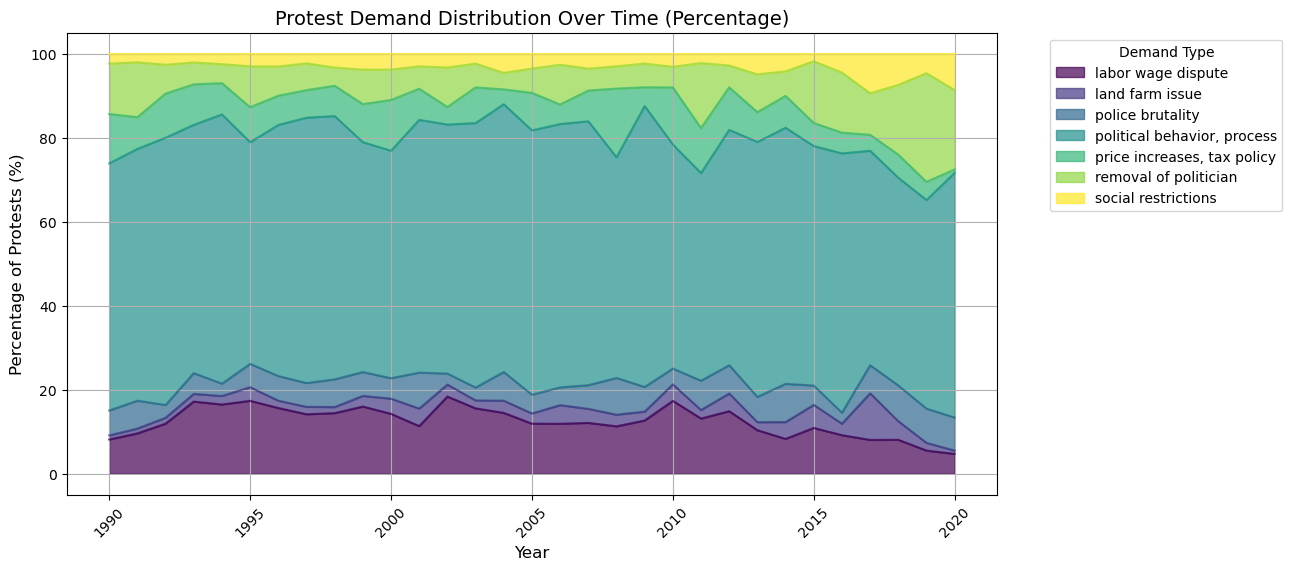

In [464]:
demand_distribution = df_protest[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']].stack()
demand_distribution = demand_distribution.reset_index(name='demand')

demand_distribution['year'] = df_protest.loc[demand_distribution['level_0'], 'year'].values

demand_counts = demand_distribution.groupby(['year', 'demand']).size().unstack(fill_value=0)

demand_counts_percent = demand_counts.divide(demand_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
demand_counts_percent.plot(kind='area', stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.7)
plt.title('Protest Demand Distribution Over Time (Percentage)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Protests (%)', fontsize=12)
plt.legend(title="Demand Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45, fontsize=10)
plt.show()


#### The most common reason for protests by far was political behavior and processes, and this breakdown hasn't changed over time. 

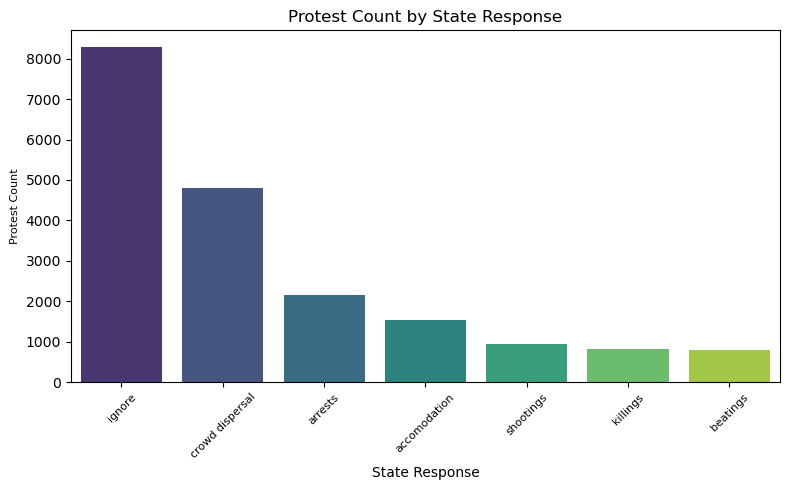

In [280]:
response_distribution = df_protest[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6']].stack()

response_counts = response_distribution.value_counts()

response_counts_df = response_counts.reset_index()
response_counts_df.columns = ['response', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=response_counts_df, x='response', y='count', hue='response', palette='viridis', legend=False)
plt.title('Protest Count by State Response', fontsize=12)
plt.xlabel('State Response', fontsize=10)
plt.ylabel('Protest Count', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

#### Most common state response is to ignore protest, with violent responses being less common. 

* Note that a given protest can have multiple responses, for example, the state could ignore them at first, then accomodate them later on.

In [282]:
filtered_df = filter_by_response(df_protest, 'accomodation')

#### Success is being defined as having the state accomodate the protest at any point.

In [286]:
response_string = 'accomodation'

df_protest['success'] = df_protest[['stateresponse1', 'stateresponse2', 'stateresponse3', 
                           'stateresponse4', 'stateresponse5', 'stateresponse6']].apply(
    lambda row: 1 if response_string in row.dropna().values else 0, axis=1
)

df_joined['success'] = df_protest[['stateresponse1', 'stateresponse2', 'stateresponse3', 
                           'stateresponse4', 'stateresponse5', 'stateresponse6']].apply(
    lambda row: 1 if response_string in row.dropna().values else 0, axis=1
)

In [287]:
success_rate = df_protest['success'].mean()
success_rate

0.10007218321412166

### About 10% of protests result in success.

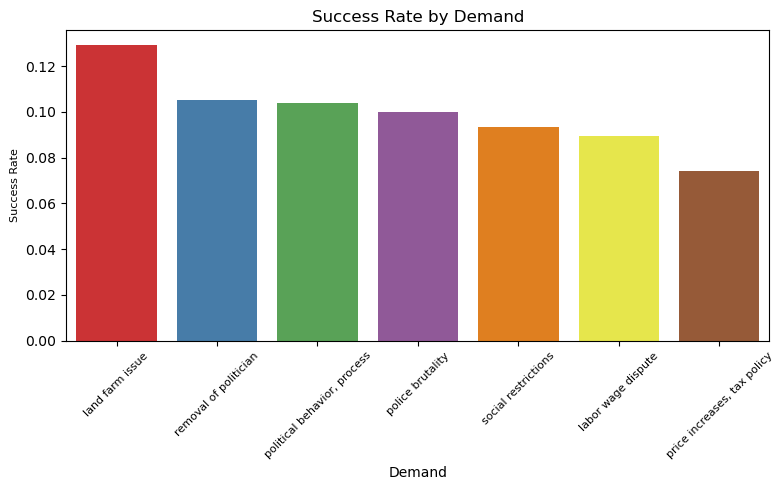

In [289]:
demand_distribution = df_protest[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']].stack().reset_index(name='demand')

demand_success = demand_distribution.merge(df_protest[['success']], left_index=True, right_index=True)

success_rate_by_demand = demand_success.groupby('demand')['success'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=success_rate_by_demand.index, y=success_rate_by_demand.values, hue=success_rate_by_demand.index, palette='Set1', legend=False)
plt.title('Success Rate by Demand', fontsize=12)
plt.xlabel('Demand', fontsize=10)
plt.ylabel('Success Rate', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

In [290]:
protestor_viol_rate = df_protest['protesterviolence'].mean()
protestor_viol_rate

0.2647811536190039

### 26.4% of protests have some sort of violence

e_regionpol_7C : region, politico-geographic 7 category

In [293]:
region_mapping = {
    1:'Eastern Europe',
    2:'Latin America and the Carribean',
    3:'Middle East and North Africa',
    4:'Sub-Saharan Africa',
    5:'Western Europe and North America',
    6:'East Asia and the Pacfic',
    7:'South and Central Asia'
}

In [294]:
df_joined['e_regionpol_7C'] = df_joined['e_regionpol_7C'].replace(region_mapping)

In [295]:
protestor_viol_rate_by_region = df_joined.groupby('e_regionpol_7C')['protesterviolence'].mean().sort_values(ascending=False)

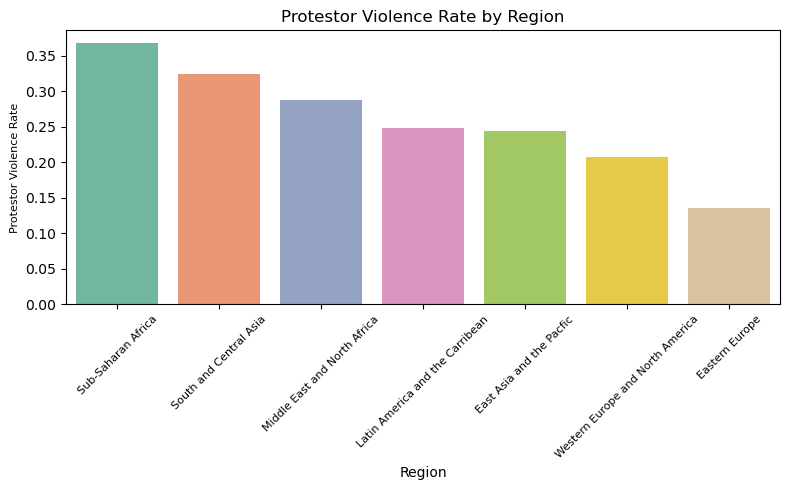

In [296]:
plt.figure(figsize=(8, 5))
sns.barplot(x=protestor_viol_rate_by_region.index, y=protestor_viol_rate_by_region.values, hue=protestor_viol_rate_by_region.index, palette='Set2', legend=False)
plt.title('Protestor Violence Rate by Region', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Protestor Violence Rate', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

#### There exists a signficant variation between regions when it comes to the presence of protester violence.

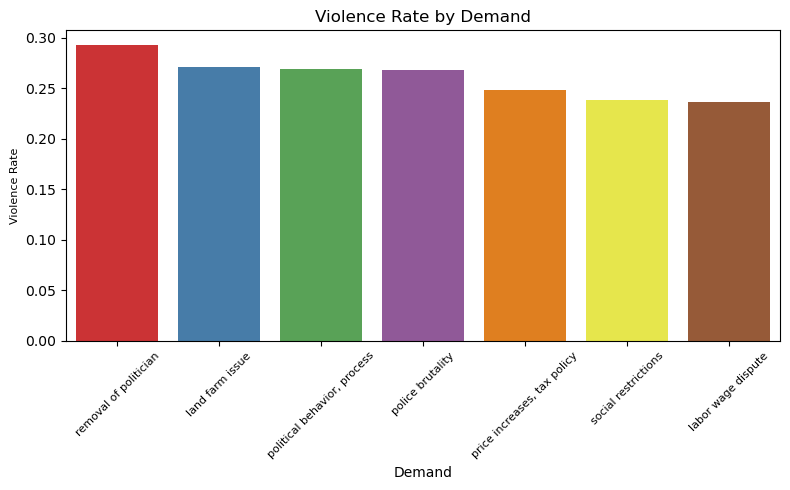

In [312]:
demand_distribution = df_protest[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']].stack().reset_index(name='demand')

demand_violence = demand_distribution.merge(df_protest[['protesterviolence']], left_index=True, right_index=True)

violence_rate_by_demand = demand_violence.groupby('demand')['protesterviolence'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=violence_rate_by_demand.index, y=violence_rate_by_demand.values, hue=violence_rate_by_demand.index, palette='Set1', legend=False)
plt.title('Violence Rate by Demand', fontsize=12)
plt.xlabel('Demand', fontsize=10)
plt.ylabel('Violence Rate', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

#### Protests motivated by the removal of a politican have the highest rates of protester violence.

In [319]:
df_filtered = df_joined.groupby('country').filter(lambda x: len(x) > 30)
protestor_viol_rate_by_country = df_filtered.groupby('country')['protesterviolence'].mean().sort_values(ascending=False)
protestor_success_rate_by_country = df_filtered.groupby('country')['success'].mean().sort_values(ascending=False)

In [320]:
protestor_viol_rate_by_country

country
Guinea                   0.666667
Gabon                    0.657143
Comoros                  0.625000
Republic of the Congo    0.600000
Haiti                    0.528455
                           ...   
Lithuania                0.057143
Ireland                  0.046404
Uruguay                  0.029412
Latvia                   0.011765
Cuba                     0.010101
Name: protesterviolence, Length: 124, dtype: float64

In [483]:
indices = ['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem', 'v2x_api', 'v2x_mpi','v2x_freexp_altinf', 
           'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff', 'v2x_liberal', 'v2xcl_rol', 'v2x_jucon', 'v2xlg_legcon', 
           'v2x_partip', 'v2x_cspart', 'v2x_egal', 'v2xeg_eqprotec', 'v2xeg_eqaccess', 'v2xeg_eqdr']
df_filtered = df_joined.groupby('country').filter(lambda x: len(x) > 30)

protestor_viol_rate_by_country = df_filtered.groupby('country')['protesterviolence'].mean()

protestor_success_rate_by_country = df_filtered.groupby('country')['success'].mean()

index_avg_by_country = {}

for index in indices:
    index_avg_by_country[f'{index}_avg'] = df_filtered.groupby('country')[index].mean()

result = pd.DataFrame({
    'protestor_violence': protestor_viol_rate_by_country,
    'protestor_success': protestor_success_rate_by_country,
    **index_avg_by_country
})

indices_columns = [f'{index}_avg' for index in indices]


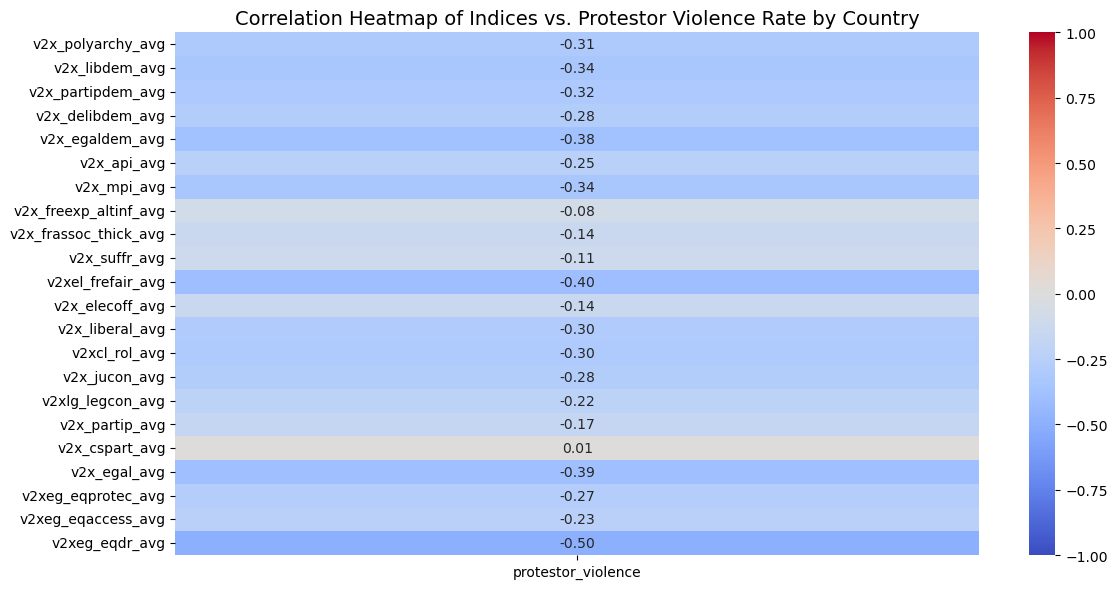

In [485]:
corr_matrix_with_violence = result[['protestor_violence'] + indices_columns].corr().iloc[0:1, 1:]

corr_matrix_with_violence = corr_matrix_with_violence.T

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_with_violence, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)

plt.title('Correlation Heatmap of Indices vs. Protestor Violence Rate by Country', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

There exists a negative correlation between almost all of the indices as protestor violence rates. 

This means that **more democratic countries** tend to have **significantly less protestor violence**. 

#### The most significant indices seem to be:
* v2x_egaldem_avg : To what extent is egalitarian democracy achieved?
* v2xel_frefair_avg : To what extent are elections free and fair?
* v2x_egal_avg : To what extent is egalitarian principle achieved?
* v2xeg_eqdr_avg : How equal is the distribution of resources?

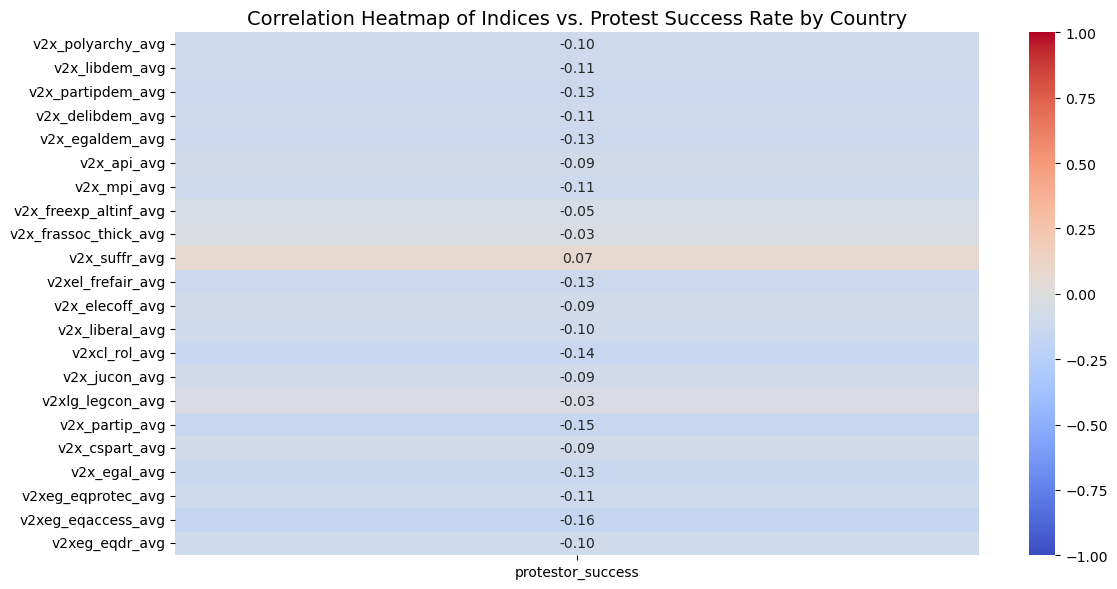

In [351]:
corr_matrix_with_success = result[['protestor_success'] + indices_columns].corr().iloc[0:1, 1:]

corr_matrix_with_success = corr_matrix_with_success.T

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_with_success, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)

plt.title('Correlation Heatmap of Indices vs. Protest Success Rate by Country', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


Suffrage is slightly positively correlated with success rate.

All of the other indices observed have no signficiant correlation or a small negative correlation with success rate. 

This means that, for the most part, countries that are **more democratic** have **slightly less successful protests**. 

In [356]:
correlation = df_joined[['protesterviolence', 'success']].corr()
correlation

,protesterviolence,success
protesterviolence,1.000000,0.001909
success,0.001909,1.000000


#### There exists no correlation between the presence of violence from protesters and the success of the protest.

# Conclusion

### Temporal and Geographic Patterns

The dataset reveals spikes in protest activity during the 2010s, with a marked rise in the Middle East and North Africa during the Arab Spring. This region saw as surge of protests around 2011 with countries like Tunisia, Yemen, and Egypt experiencing significant unrest.

### State Responses and Protester Demands

The analysis of state responses reveals varying levels of repression or tolerance depending on the political climate. The role of state actions in stifling or enabling protest movements seems to correlate with their success, suggesting that the state can be a signficant determinant in protest outcomes.

### Protest Characteristics and Violence

Most protests were focused on political behavior and processes, and this trend doesn't seem to have changed over time. Countries that are more democratic and egalitarian tend to have less violent protests, but also slightly less successful protests. Countries with higher rates of suffrage have slightly more successful protests on average.

# Impact

In order to have a greater impact with this analysis, more time would be needed to explore the relationships between different country attributes and protest outcomes. With more specific analytical questions, the data could be explored at a more fine level, with more detailed analysis.